# Dimension reduction with PCA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve
import random
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## df_merged_zero_15x15

In [2]:
df_merged_mean_15x15 = pd.read_csv('data/df_merged_zero_15x15_final.csv')
df_merged_mean_15x15

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,8.102808,0.393628,1.778462,10.588528,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908,0.000000,...,1.135922,0.263305,2.588783,5.632908,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ukc1101-06000,2020-05-18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081,0.000000,...,7.356489,0.183889,3.869243,3.158081,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187108,ukk4307-33900,2022-09-28,0,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839,0.000000,...,4.906127,0.142344,5.219365,2.063839,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730,0.000000,...,9.181858,0.151466,4.857575,2.291730,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730


In [4]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [5]:
df_train = df_merged_mean_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')

X_train = df_train


print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)


In [8]:
# Scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [9]:
# test the total explained variance by increasing the number of components
explained_variance = []
n_components = np.arange(3, X_train.shape[1] + 1)
for n in n_components:
    pca = PCA(n_components=n, random_state=100)
    pca.fit_transform(X_train)
    variance = pca.explained_variance_ratio_.sum()
    explained_variance.append(variance)

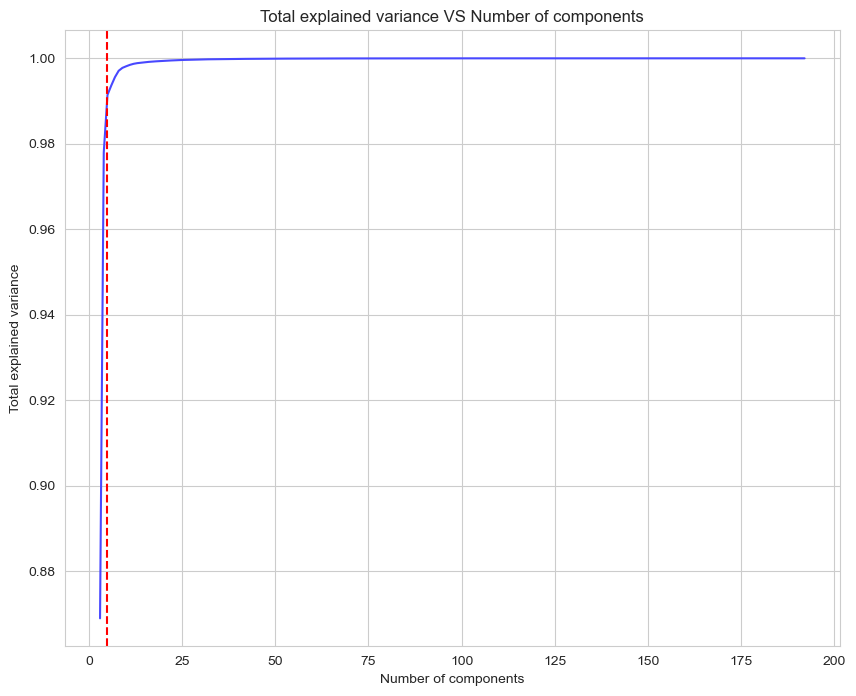

We choose 5 as the number of principle component, as 99% variance can be explained by 5 components.


In [11]:
threshold = 0.99
optimal_n = next((n for n, variance in zip(n_components, explained_variance) if variance >= threshold), None)

sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.figure(figsize=(10, 8))
plt.plot(n_components, explained_variance)
plt.axvline(x=optimal_n, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.title('Total explained variance VS Number of components')
plt.savefig('results/PCA_for_mean.png')
plt.show()

print(f"We choose {optimal_n} as the number of principle component, as 99% variance can be explained by {optimal_n} components.")